# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset Overview

In [2]:
df_trx = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=1, header=1)
df_trx.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [84]:
df_cust = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=2, header=1)
df_cust.head()

/var/folders/v4/0_xjmlhs3g97b1210d3fl8y80000gn/T/ipykernel_1035/3488962859.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_cust = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=2, header=1)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [126]:
cust = df_cust.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1)
cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,address,postcode,state,country,property_valuation,Rank,Value,Age,gender_fe,Age_Bin
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.0,Male,Elderly
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,52.0,Male,Pre-Retirement
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,47.0,Female,Pre-Retirement
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,43.0,Female,Middle Age
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,115 Montana Place,2093,NSW,Australia,9,4,1.703125,56.0,Female,Retirement


In [129]:
#cust.to_csv('customer_list.csv')

In [83]:
df_demograph = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=3, header=1)
df_demograph.head()

/var/folders/v4/0_xjmlhs3g97b1210d3fl8y80000gn/T/ipykernel_1035/3453451002.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_demograph = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=3, header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
df_address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=4, header=1)
df_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
print(f'transaction dataset consist of {df_trx.shape[0]} rows and {df_trx.shape[1]} columns')
print(f'new customers dataset consist of {df_cust.shape[0]} rows and {df_cust.shape[1]} columns')
print(f'customer demographic dataset consist of {df_demograph.shape[0]} rows and {df_demograph.shape[1]} columns')
print(f'customer address dataset consist of {df_address.shape[0]} rows and {df_address.shape[1]} columns')

transaction dataset consist of 20000 rows and 13 columns
new customers dataset consist of 1000 rows and 23 columns
customer demographic dataset consist of 4000 rows and 13 columns
customer address dataset consist of 3999 rows and 6 columns


In [8]:
# Create Data Info

list_item = []
for col in df_trx.columns:
    list_item.append([col, df_trx[col].dtype, df_trx[col].isna().sum(), 100*df_trx[col].isna().sum()/len(df_trx[col]), df_trx[col].nunique(), df_trx[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,transaction_id,int64,0,0.000,20000,"[1, 2, 3, 4]"
1,product_id,int64,0,0.000,101,"[2, 3, 37, 88]"
2,customer_id,int64,0,0.000,3494,"[2950, 3120, 402, 3135]"
3,transaction_date,datetime64[ns],0,0.000,364,"[2017-02-25T00:00:00.000000000, 2017-05-21T00:..."
4,online_order,float64,360,1.800,2,"[0.0, 1.0, nan]"
5,order_status,object,0,0.000,2,"[Approved, Cancelled]"
6,brand,object,197,0.985,6,"[Solex, Trek Bicycles, OHM Cycles, Norco Bicyc..."
7,product_line,object,197,0.985,4,"[Standard, Road, Mountain, Touring]"
8,product_class,object,197,0.985,3,"[medium, low, high, nan]"
9,product_size,object,197,0.985,3,"[medium, large, small, nan]"


In [9]:
# Create Data Info

list_item = []
for col in df_cust.columns:
    list_item.append([col, df_cust[col].dtype, df_cust[col].isna().sum(), 100*df_cust[col].isna().sum()/len(df_cust[col]), df_cust[col].nunique(), df_cust[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,first_name,object,0,0.0,940,"[Chickie, Morly, Ardelis, Lucine]"
1,last_name,object,29,2.9,961,"[Brister, Genery, Forrester, Stutt]"
2,gender,object,0,0.0,3,"[Male, Female, U]"
3,past_3_years_bike_related_purchases,int64,0,0.0,100,"[86, 69, 10, 64]"
4,DOB,datetime64[ns],17,1.7,958,"[1957-07-12T00:00:00.000000000, 1970-03-22T00:..."
5,job_title,object,106,10.6,184,"[General Manager, Structural Engineer, Senior ..."
6,job_industry_category,object,165,16.5,9,"[Manufacturing, Property, Financial Services, ..."
7,wealth_segment,object,0,0.0,3,"[Mass Customer, Affluent Customer, High Net Wo..."
8,deceased_indicator,object,0,0.0,1,[N]
9,owns_car,object,0,0.0,2,"[Yes, No]"


In [10]:
# Create Data Info

list_item = []
for col in df_demograph.columns:
    list_item.append([col, df_demograph[col].dtype, df_demograph[col].isna().sum(), 100*df_demograph[col].isna().sum()/len(df_demograph[col]), df_demograph[col].nunique(), df_demograph[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,customer_id,int64,0,0.000,4000,"[1, 2, 3, 4]"
1,first_name,object,0,0.000,3139,"[Laraine, Eli, Arlin, Talbot]"
2,last_name,object,125,3.125,3725,"[Medendorp, Bockman, Dearle, nan]"
3,gender,object,0,0.000,6,"[F, Male, Female, U]"
4,past_3_years_bike_related_purchases,int64,0,0.000,100,"[93, 81, 61, 33]"
5,DOB,datetime64[ns],87,2.175,3448,"[1953-10-12T00:00:00.000000000, 1980-12-16T00:..."
6,job_title,object,506,12.650,195,"[Executive Secretary, Administrative Officer, ..."
7,job_industry_category,object,656,16.400,9,"[Health, Financial Services, Property, IT]"
8,wealth_segment,object,0,0.000,3,"[Mass Customer, Affluent Customer, High Net Wo..."
9,deceased_indicator,object,0,0.000,2,"[N, Y]"


In [11]:
# Create Data Info

list_item = []
for col in df_address.columns:
    list_item.append([col, df_address[col].dtype, df_address[col].isna().sum(), 100*df_address[col].isna().sum()/len(df_address[col]), df_address[col].nunique(), df_address[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,customer_id,int64,0,0.0,3999,"[1, 2, 4, 5]"
1,address,object,0,0.0,3996,"[060 Morning Avenue, 6 Meadow Vale Court, 0 Ho..."
2,postcode,int64,0,0.0,873,"[2016, 2153, 4211, 2448]"
3,state,object,0,0.0,5,"[New South Wales, QLD, VIC, NSW]"
4,country,object,0,0.0,1,[Australia]
5,property_valuation,int64,0,0.0,12,"[10, 9, 4, 12]"


# Data Exploration

In [6]:
df_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [35]:
df_demograph.shape, df_cust.shape

((4000, 15), (1000, 25))

## Feature Engineering

### `Age`

In [8]:
# import library datetime for feature extraction
import datetime
reference_date=datetime.datetime(2022,8,17)
reference_date

datetime.datetime(2022, 8, 17, 0, 0)

In [85]:
df_demograph['Age'] = (reference_date - df_demograph['DOB']).astype('timedelta64[Y]')
df_cust['Age'] = (reference_date - df_cust['DOB']).astype('timedelta64[Y]')

### `Gender`

In [81]:
df_demograph['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [86]:
df_demograph['gender_fe'] = df_demograph['gender'].map({'M':'Male',
                                                     'U':'Female',
                                                     'Femal':'Female',
                                                     'F':'Female',
                                                     'Female':'Female',
                                                     'Male':'Male'})

df_demograph['gender_fe'].value_counts()

Female    2127
Male      1873
Name: gender_fe, dtype: int64

In [87]:
df_cust['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [88]:
df_cust['gender_fe'] = df_cust['gender'].map({'Female':'Female',
                                           'Male':'Male',
                                           'U':'Female'})

df_cust['gender_fe'].value_counts()

Female    530
Male      470
Name: gender_fe, dtype: int64

## Univariate Analysis

### `Age`

<AxesSubplot:xlabel='Age', ylabel='Density'>

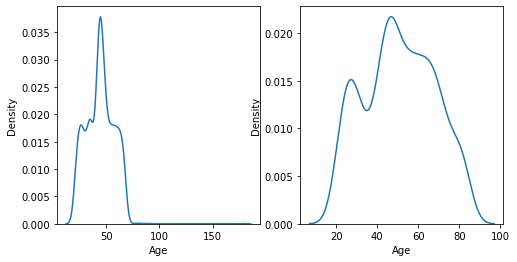

In [22]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
sns.kdeplot(df_demograph['Age'], ax=axes[0])
sns.kdeplot(df_cust['Age'], ax=axes[1])

In [33]:
df_cust['Age'].describe()

count    983.000000
mean      50.806714
std       17.063834
min       20.000000
25%       39.000000
50%       50.000000
75%       64.000000
max       84.000000
Name: Age, dtype: float64

In [90]:
df_demograph['Age_Bin'] = np.where((df_demograph['Age']>=0)&(df_demograph['Age']<=34),'Early Worker Age',
                          np.where((df_demograph['Age']>34)&(df_demograph['Age']<=44),'Middle Age',
                          np.where((df_demograph['Age']>44)&(df_demograph['Age']<=54),'Pre-Retirement',
                          np.where((df_demograph['Age']>54)&(df_demograph['Age']<=64),'Retirement','Elderly'))))

df_demograph['Age_Bin'].value_counts()

Pre-Retirement      1015
Middle Age          1007
Early Worker Age     938
Retirement           701
Elderly              339
Name: Age_Bin, dtype: int64

In [91]:
df_cust['Age_Bin'] = np.where((df_cust['Age']>=0)&(df_cust['Age']<=34),'Early Worker Age',
                     np.where((df_cust['Age']>34)&(df_cust['Age']<=44),'Middle Age',
                     np.where((df_cust['Age']>44)&(df_cust['Age']<=54),'Pre-Retirement',
                     np.where((df_cust['Age']>54)&(df_cust['Age']<=64),'Retirement','Elderly'))))

df_cust['Age_Bin'].value_counts()

Elderly             260
Early Worker Age    215
Pre-Retirement      203
Retirement          180
Middle Age          142
Name: Age_Bin, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


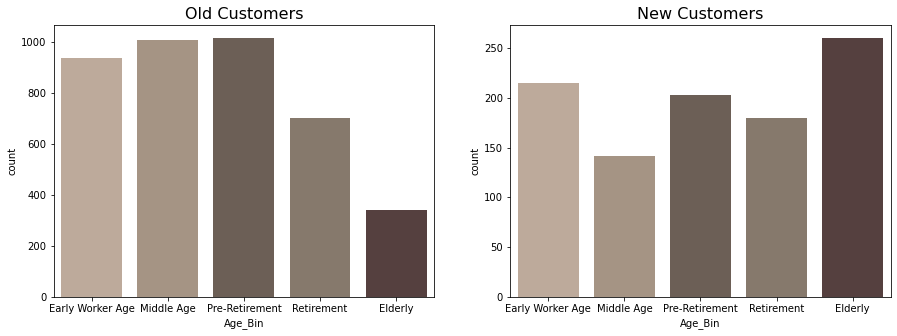

In [105]:
pal = ['#c3a995', '#ab947e', '#6f5e53', '#8a7968', '#593d3b']
order_list = ['Early Worker Age','Middle Age','Pre-Retirement','Retirement','Elderly']

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_demograph['Age_Bin'], ax=axes[0], order=order_list, palette=pal)
axes[0].set_title('Old Customers', fontsize = 16)
sns.countplot(df_cust['Age_Bin'], ax=axes[1], order=order_list, palette=pal)
axes[1].set_title('New Customers', fontsize = 16)

#plt.savefig('figure1.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

Text(0.5, 1.0, 'New Customers')

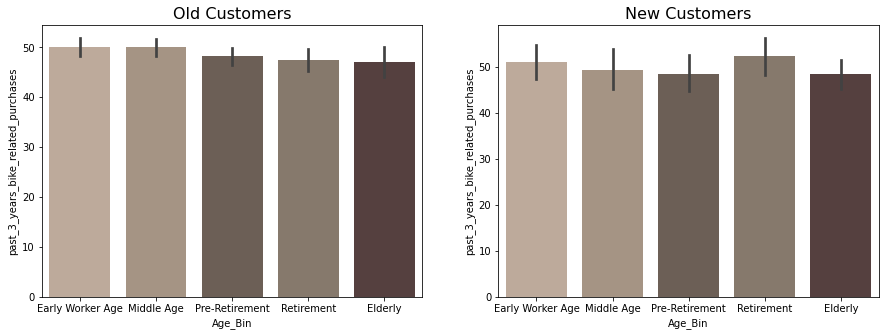

In [108]:
pal = ['#c3a995', '#ab947e', '#6f5e53', '#8a7968', '#593d3b']
order_list = ['Early Worker Age','Middle Age','Pre-Retirement','Retirement','Elderly']

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=df_demograph['Age_Bin'], y=df_demograph['past_3_years_bike_related_purchases'], ax=axes[0], order=order_list, palette=pal)
axes[0].set_title('Old Customers', fontsize = 16)
sns.barplot(x=df_cust['Age_Bin'], y=df_cust['past_3_years_bike_related_purchases'], ax=axes[1], order=order_list, palette=pal)
axes[1].set_title('New Customers', fontsize = 16)

#plt.savefig('figure1.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

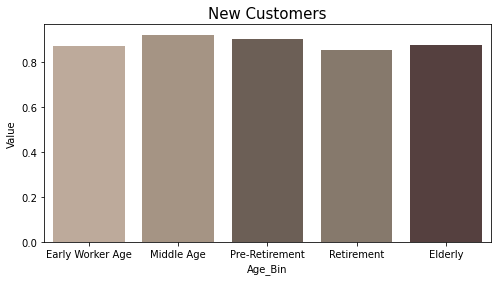

In [107]:
order_list = ['Early Worker Age','Middle Age','Pre-Retirement','Retirement','Elderly']
plt.figure(figsize=(8,4))
sns.barplot(x=df_cust['Age_Bin'], y=df_cust['Value'], palette=pal, ci=None, order=order_list)
plt.title('New Customers', fontsize=15)

#plt.savefig('figure2.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

### `wealth_segment`

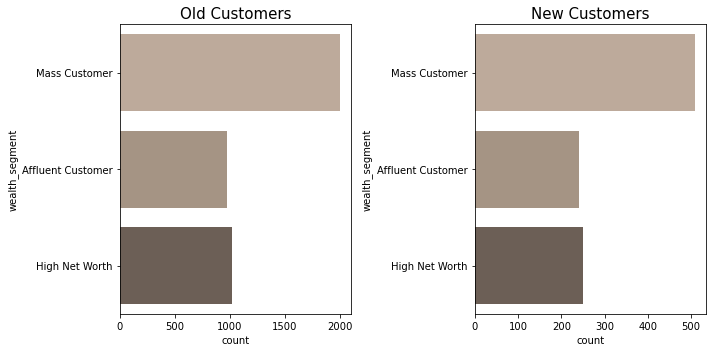

In [119]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(y='wealth_segment', data=df_demograph, palette=pal,ax=axes[0])
sns.countplot(y='wealth_segment', data=df_cust,  palette=pal, ax=axes[1])

axes[0].set_title('Old Customers', fontsize=15)
axes[1].set_title('New Customers', fontsize=15)

plt.tight_layout()

#plt.savefig('figure2.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

### `job_industry_category`

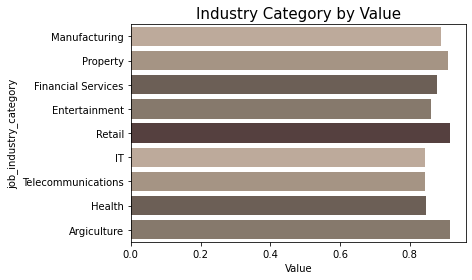

In [123]:
sns.barplot(y='job_industry_category', x='Value', palette=pal, ci=None, data=df_cust)
plt.title('Industry Category by Value', fontsize=15)

#plt.savefig('figure3.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

In [100]:
df_cust['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', nan, 'Argiculture'],
      dtype=object)

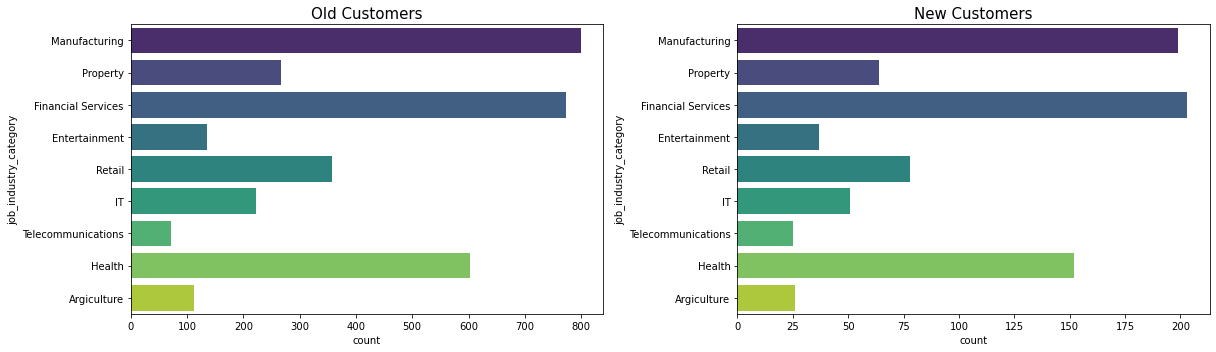

In [101]:
order_list = ['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
              'Retail', 'IT', 'Telecommunications', 'Health', 'Argiculture']

fig, axes = plt.subplots(1,2,figsize=(17,5))
sns.countplot(y='job_industry_category', data=df_demograph, palette='viridis',ax=axes[0], order=order_list)
sns.countplot(y='job_industry_category', data=df_cust,  palette='viridis', ax=axes[1], order=order_list)

axes[0].set_title('Old Customers', fontsize=15)
axes[1].set_title('New Customers', fontsize=15)

plt.tight_layout()

### `Gender`

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


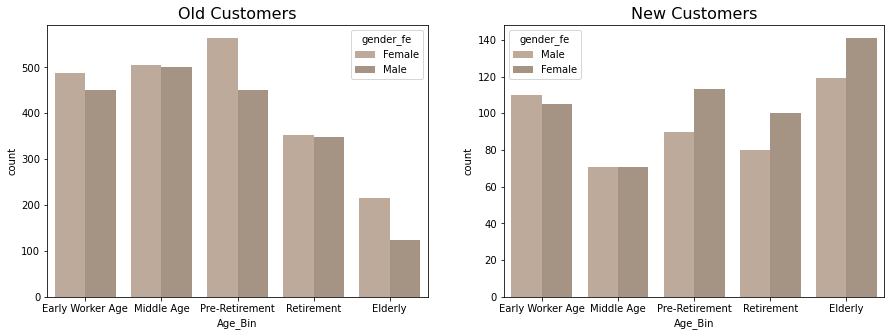

In [125]:
order_list = ['Early Worker Age','Middle Age','Pre-Retirement','Retirement','Elderly']

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_demograph['Age_Bin'], ax=axes[0], order=order_list, palette=pal, hue=df_demograph['gender_fe'])
axes[0].set_title('Old Customers', fontsize = 16)
sns.countplot(df_cust['Age_Bin'], ax=axes[1], order=order_list, palette=pal, hue=df_cust['gender_fe'])
axes[1].set_title('New Customers', fontsize = 16)

#plt.savefig('figure4.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)